## 1. Import

In [1001]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [1002]:
all_fights = pd.read_csv('ufc-master.csv')
all_fights

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,...,Elbows,3.0,0:39,639.0,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,...,Elbows,3.0,3:21,801.0,275.0,550.0,500.0,700.0,300.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,Duane Ludwig,Darren Elkins,-155.0,135.0,64.5161,135.0,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,...,NaN,1.0,0:44,44.0,NaN,NaN,NaN,NaN,NaN,NaN
6524,John Howard,Daniel Roberts,-210.0,175.0,47.6190,175.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punch,1.0,2:01,121.0,NaN,NaN,NaN,NaN,NaN,NaN
6525,Brendan Schaub,Chase Gormley,-260.0,220.0,38.4615,220.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,Punches,1.0,0:47,47.0,NaN,NaN,NaN,NaN,NaN,NaN
6526,Mike Pierce,Julio Paulino,-420.0,335.0,23.8095,335.0,2010-03-21,"Broomfield, Colorado, USA",USA,Red,...,NaN,3.0,5:00,900.0,NaN,NaN,NaN,NaN,NaN,NaN


In [1003]:
all_fights.shape

(6528, 118)

In [1004]:
print(list(all_fights.columns))

['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue', 'BlueExpectedValue', 'Date', 'Location', 'Country', 'Winner', 'TitleBout', 'WeightClass', 'Gender', 'NumberOfRounds', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws', 'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgSubAtt', 'BlueAvgTDLanded', 'BlueAvgTDPct', 'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance', 'BlueHeightCms', 'BlueReachCms', 'BlueWeightLbs', 'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws', 'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt', 'RedAvgTDLanded', 'RedAvgTDPct', 'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought', 'RedTotalTitleBouts', 'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous', 'RedWinsByKO', 

In [1005]:
all_fights.dtypes

RedFighter           object
BlueFighter          object
RedOdds             float64
BlueOdds            float64
RedExpectedValue    float64
                     ...   
BlueDecOdds         float64
RSubOdds            float64
BSubOdds            float64
RKOOdds             float64
BKOOdds             float64
Length: 118, dtype: object

In [1006]:
all_fights.describe()

,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,...,BFlyweightRank,BPFPRank,FinishRound,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
count,6301.000000,6302.000000,6301.000000,6302.000000,6528.000000,6528.000000,6528.000000,6528.000000,5598.000000,5763.000000,...,130.000000,67.000000,5906.000000,5906.000000,5441.000000,5412.000000,5192.000000,5169.000000,5194.000000,5168.000000
mean,-115.711474,59.793240,96.658224,165.054566,3.185509,0.501072,0.957567,0.023131,19.841810,0.453059,...,8.407692,9.194030,2.424145,657.536234,308.333395,425.870288,884.048151,1100.497775,510.891606,636.463235
std,277.225783,253.117416,85.891109,137.689177,0.577441,0.794303,1.406786,0.156327,20.315307,0.110787,...,4.307369,4.352773,1.007887,360.383418,250.750088,325.940028,601.826547,671.106177,426.563458,465.014634
min,-2100.000000,-1200.000000,4.761900,8.333300,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,5.000000,-440.000000,-200.000000,-370.000000,-1250.000000,-550.000000,-400.000000
25%,-255.000000,-150.000000,39.215700,66.666700,3.000000,0.000000,0.000000,0.000000,3.880000,0.400000,...,5.000000,5.000000,1.000000,299.000000,170.000000,222.000000,439.750000,600.000000,225.000000,310.000000
50%,-150.000000,130.000000,66.666700,130.000000,3.000000,0.000000,0.000000,0.000000,9.280000,0.460000,...,8.000000,10.000000,3.000000,900.000000,250.000000,350.000000,750.000000,1000.000000,420.000000,525.000000
75%,130.000000,215.000000,130.000000,215.000000,3.000000,1.000000,1.000000,0.000000,32.666700,0.513000,...,12.000000,13.500000,3.000000,900.000000,400.000000,550.000000,1200.000000,1450.000000,700.000000,875.000000
max,775.000000,1300.000000,775.000000,1300.000000,5.000000,6.000000,12.000000,2.000000,154.000000,1.000000,...,15.000000,15.000000,5.000000,1500.000000,2400.000000,3000.000000,4665.000000,5000.000000,4000.000000,4000.000000


## 2. Data Preparation


In [1007]:
# Locate duplicates
all_fights.loc[all_fights.duplicated()]

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds


In [1008]:
all_fights.shape

(6528, 118)

In [1009]:
# Removing fights that involve fighters with no wins or losses
all_fights = all_fights[~(
    ((all_fights['RedWins'] == 0) & (all_fights['RedLosses'] == 0)) |
    ((all_fights['BlueWins'] == 0) & (all_fights['BlueLosses'] == 0)))]

In [1010]:
# Removing fights with abnormal stats
all_fights = all_fights[~(
    (all_fights['RedAvgSigStrLanded'] > 8.66) |
    (all_fights['BlueAvgSigStrLanded'] > 8.66))]

In [1011]:
# Creating separate dataframes: One for general analysis, and one for prediction modeling. Remove columns that won't be used in analysis/prediction.

analysis_df = all_fights[['RedFighter', 'BlueFighter', 'Winner', 'TitleBout', 'WeightClass', 'Gender', 'NumberOfRounds', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws',
                          'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance', 'BlueHeightCms', 'BlueReachCms', 
                          'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgTDPct', 'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgTDPct',
                          'BlueWeightLbs', 'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws', 'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought', 'RedTotalTitleBouts', 'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous', 'RedWinsByKO', 'RedWinsBySubmission', 'RedWinsByTKODoctorStoppage', 'RedWins', 'RedStance', 
                          'RedHeightCms', 'RedReachCms', 'RedWeightLbs', 'RedAge', 'BlueAge', 'LoseStreakDif', 'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif', 'TotalRoundDif', 'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif', 'ReachDif', 'AgeDif', 'SigStrDif', 'AvgSubAttDif', 'AvgTDDif',
                          'Finish', 'FinishRound', 'FinishRoundTime', 'TotalFightTimeSecs']
]
prediction_df = all_fights[['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue', 
                         'BlueExpectedValue', 
                         'Winner', 'TitleBout','NumberOfRounds',
                        'LoseStreakDif', 'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif', 
                             'TotalRoundDif', 'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif', 'ReachDif', 'AgeDif', 
                             'SigStrDif', 'AvgSubAttDif', 'AvgTDDif', 'BetterRank', 'Finish']]



In [1012]:
# For colummns with null values, find ratio of null entries to total entries
def print_null_ratios(df):
    for col in df.columns:
        total_nulls = df[col].isnull().sum()
        ratio = total_nulls / df.shape[0]
        if total_nulls > 0:
            print(f"{col:<25} {total_nulls:<15} {ratio:<8.3f}")


In [1013]:
# Number of null values in dataset of all fights
print(f"{'Column:':<25} {'Total Nulls:':<15} {'Ratio:':<8}")
print_null_ratios(analysis_df)


Column:                   Total Nulls:    Ratio:  
BlueStance                1               0.000   
BlueAvgSigStrLanded       79              0.033   
BlueAvgTDPct              7               0.003   
RedAvgSigStrLanded        79              0.033   
RedAvgTDPct               7               0.003   
Finish                    35              0.015   
FinishRound               354             0.149   
FinishRoundTime           354             0.149   
TotalFightTimeSecs        354             0.149   


In [1014]:
# Number of null values in dataset of all fights
print(f"{'Column:':<25} {'Total Nulls:':<15} {'Ratio:':<8}")
print_null_ratios(prediction_df)

Column:                   Total Nulls:    Ratio:  
RedOdds                   203             0.085   
BlueOdds                  202             0.085   
RedExpectedValue          203             0.085   
BlueExpectedValue         202             0.085   
Finish                    35              0.015   


In [1015]:
# Dropping Rows with Null Values
analysis_df = analysis_df.dropna()
prediction_df = prediction_df.dropna()
print(f"Analysis df shape after dropping nulls: {analysis_df.shape}")
print(f"Prediction df shape after dropping nulls: {prediction_df.shape}")

Analysis df shape after dropping nulls: (1959, 70)
Prediction df shape after dropping nulls: (2136, 26)


In [1016]:
prediction_df['Winner'].unique()

array(['Red', 'Blue'], dtype=object)

In [1017]:
# Looking at all the ways a fight could end
prediction_df['Finish'].unique()

array(['U-DEC', 'S-DEC', 'KO/TKO', 'SUB', 'M-DEC', 'DQ', 'Overturned'],
      dtype=object)

In [1018]:
# Removing fights that ended in a Disqualification or were overturned then
# dropping method column
prediction_df = prediction_df[~prediction_df['Finish'].isin(['DQ', 'Overturned'])]
analysis_df = analysis_df[~analysis_df['Finish'].isin(['DQ', 'Overturned'])]
prediction_df = prediction_df.drop(columns=['Finish'])

In [1019]:
# Convert Winner column to binary: 1 if Red, 0 otherwise
prediction_df['Winner = Blue'] = (prediction_df['Winner'] == 'Blue').astype(int)
prediction_df = prediction_df.drop(columns=['Winner']) 

In [1020]:
prediction_df

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,TitleBout,NumberOfRounds,LoseStreakDif,WinStreakDif,...,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,BetterRank,Winner = Blue
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0000,False,3,0,2,...,2,-5,5.08,-7.62,-3,1.3800,-1.5000,-0.7200,Red,0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0000,False,3,0,3,...,2,-1,7.62,-2.54,2,-0.3600,-0.3000,-0.1300,Red,0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0000,False,3,1,0,...,0,0,-2.54,0.00,6,1.4400,-1.1000,-2.9800,Red,0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0000,False,3,0,0,...,3,-2,2.54,-5.08,-3,-1.8400,-0.2000,-0.2500,neither,1
5,Dominick Reyes,Anthony Smith,-380.0,300.0,26.3158,300.0000,False,3,1,-1,...,3,5,0.00,-2.54,2,-1.6300,0.3000,0.1100,Red,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,Vinc Pichel,Garett Whiteley,-150.0,140.0,66.6667,140.0000,False,3,0,0,...,0,0,5.08,0.00,-2,7.0000,0.0000,0.0000,neither,0
6285,Mark Hunt,Chris Tuchscherer,225.0,-265.0,225.0000,37.7358,False,3,0,0,...,0,0,10.16,10.16,1,6.3333,0.3333,-0.6667,neither,0
6388,Steve Lopez,Waylon Lowe,140.0,-160.0,140.0000,62.5000,False,3,0,0,...,0,0,-10.16,-15.34,-3,-5.0000,0.0000,1.0000,neither,1
6456,Ben Rothwell,Gilbert Yvel,170.0,-185.0,170.0000,54.0541,False,3,0,0,...,0,0,-5.08,-2.54,-5,0.0000,0.0000,0.0000,neither,0


## 3. Exploratory Data Analysis

In [1021]:
blue_win_percentage = (analysis_df['Winner'] == 'Blue').sum() / analysis_df.shape[0]
blue_title_win_percentage = ((analysis_df['TitleBout']) & (analysis_df['Winner'] == 'Blue')).sum() / analysis_df['TitleBout'].sum()

print(f"Total Fights: {analysis_df.shape[0]}")
print(f"Total Title Fights: {analysis_df['TitleBout'].sum()}")

print(f"Blue Win Percentage: {blue_win_percentage:.3f}")
print(f"Blue Win Percentage (Title Fights): {blue_title_win_percentage:.3f}")

Total Fights: 1954
Total Title Fights: 89
Blue Win Percentage: 0.429
Blue Win Percentage (Title Fights): 0.382


In [1022]:
analysis_df

,RedFighter,BlueFighter,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,...,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,Finish,FinishRound,FinishRoundTime,TotalFightTimeSecs
1,Shavkat Rakhmonov,Ian Machado Garry,Red,False,Welterweight,MALE,3,0,8,0,...,5.08,-7.62,-3,1.3800,-1.5000,-0.7200,U-DEC,5.0,5:00,1500.0
2,Ciryl Gane,Alexander Volkov,Red,False,Heavyweight,MALE,3,0,4,0,...,7.62,-2.54,2,-0.3600,-0.3000,-0.1300,S-DEC,3.0,5:00,900.0
3,Bryce Mitchell,Kron Gracie,Red,False,Featherweight,MALE,3,2,0,0,...,-2.54,0.00,6,1.4400,-1.1000,-2.9800,KO/TKO,3.0,0:39,639.0
4,Nate Landwehr,Dooho Choi,Blue,False,Featherweight,MALE,3,0,1,1,...,2.54,-5.08,-3,-1.8400,-0.2000,-0.2500,KO/TKO,3.0,3:21,801.0
5,Dominick Reyes,Anthony Smith,Red,False,Light Heavyweight,MALE,3,1,0,0,...,0.00,-2.54,2,-1.6300,0.3000,0.1100,KO/TKO,2.0,4:46,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,Vinc Pichel,Garett Whiteley,Red,False,Lightweight,MALE,3,1,0,0,...,5.08,0.00,-2,7.0000,0.0000,0.0000,U-DEC,3.0,5:00,900.0
6285,Mark Hunt,Chris Tuchscherer,Red,False,Heavyweight,MALE,3,1,0,0,...,10.16,10.16,1,6.3333,0.3333,-0.6667,KO/TKO,2.0,1:41,401.0
6388,Steve Lopez,Waylon Lowe,Blue,False,Lightweight,MALE,3,1,0,0,...,-10.16,-15.34,-3,-5.0000,0.0000,1.0000,S-DEC,3.0,5:00,900.0
6456,Ben Rothwell,Gilbert Yvel,Red,False,Heavyweight,MALE,3,1,0,0,...,-5.08,-2.54,-5,0.0000,0.0000,0.0000,U-DEC,3.0,5:00,900.0


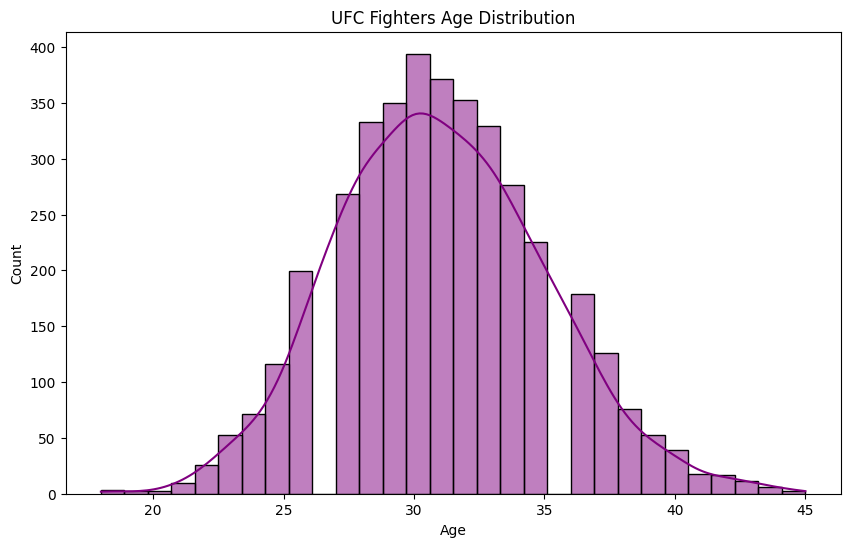

In [1023]:
# Combine red fighter's age and blue fighter's age into a single series for plotting
all_ages = pd.concat([analysis_df['RedAge'], analysis_df['BlueAge']], ignore_index=True)

# Plot the age distribution
plt.figure(figsize=(10,6))
sns.histplot(all_ages, bins=30, kde=True, color='purple')
plt.title('UFC Fighters Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

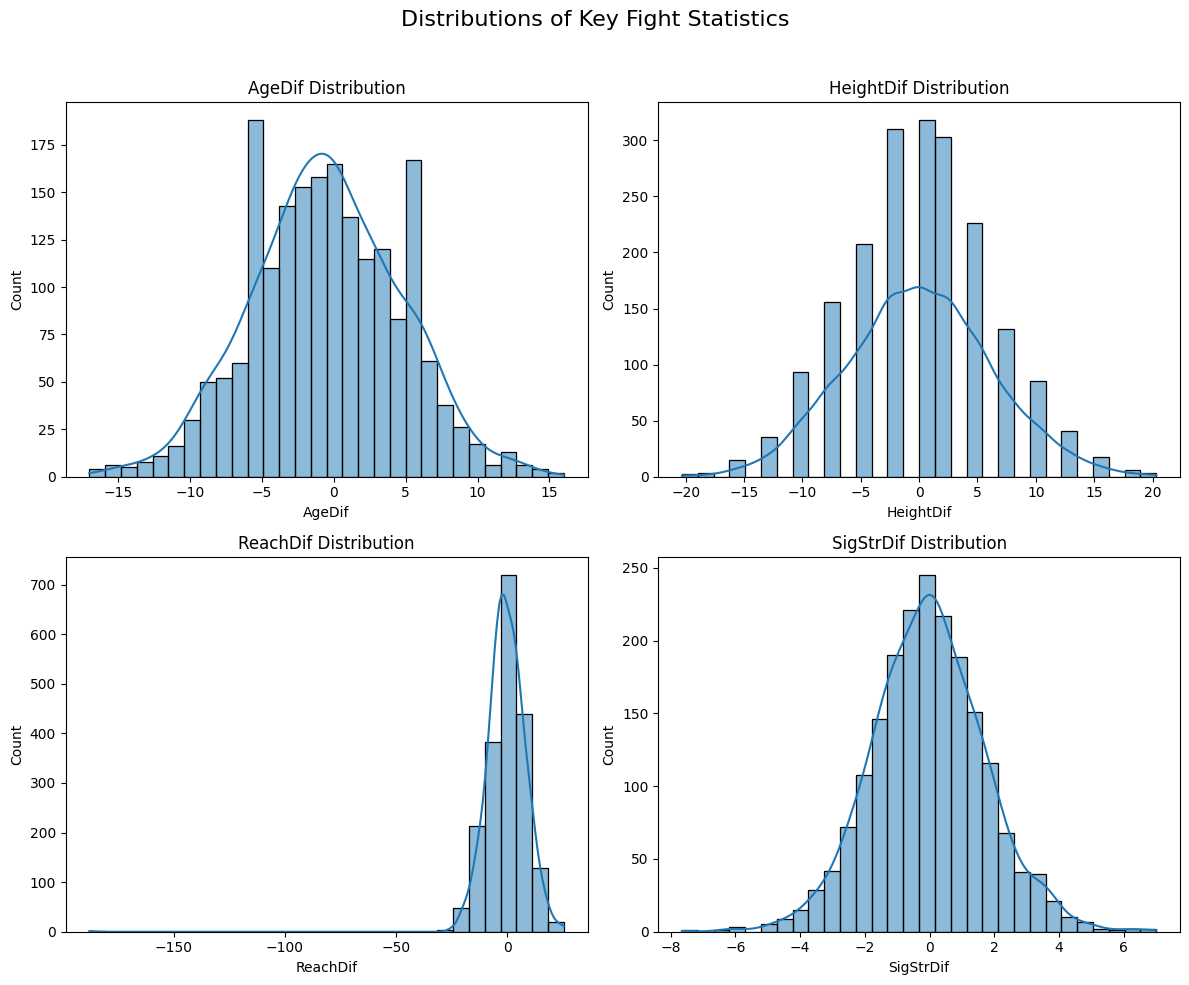

In [1024]:
key_columns = ['AgeDif', 'HeightDif', 'ReachDif', 'SigStrDif'] 
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 
fig.suptitle('Distributions of Key Fight Statistics', fontsize=16)

for ax, col in zip(axes.flatten(), key_columns):
    sns.histplot(analysis_df[col].dropna(), bins=30, kde=True, ax=ax)
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

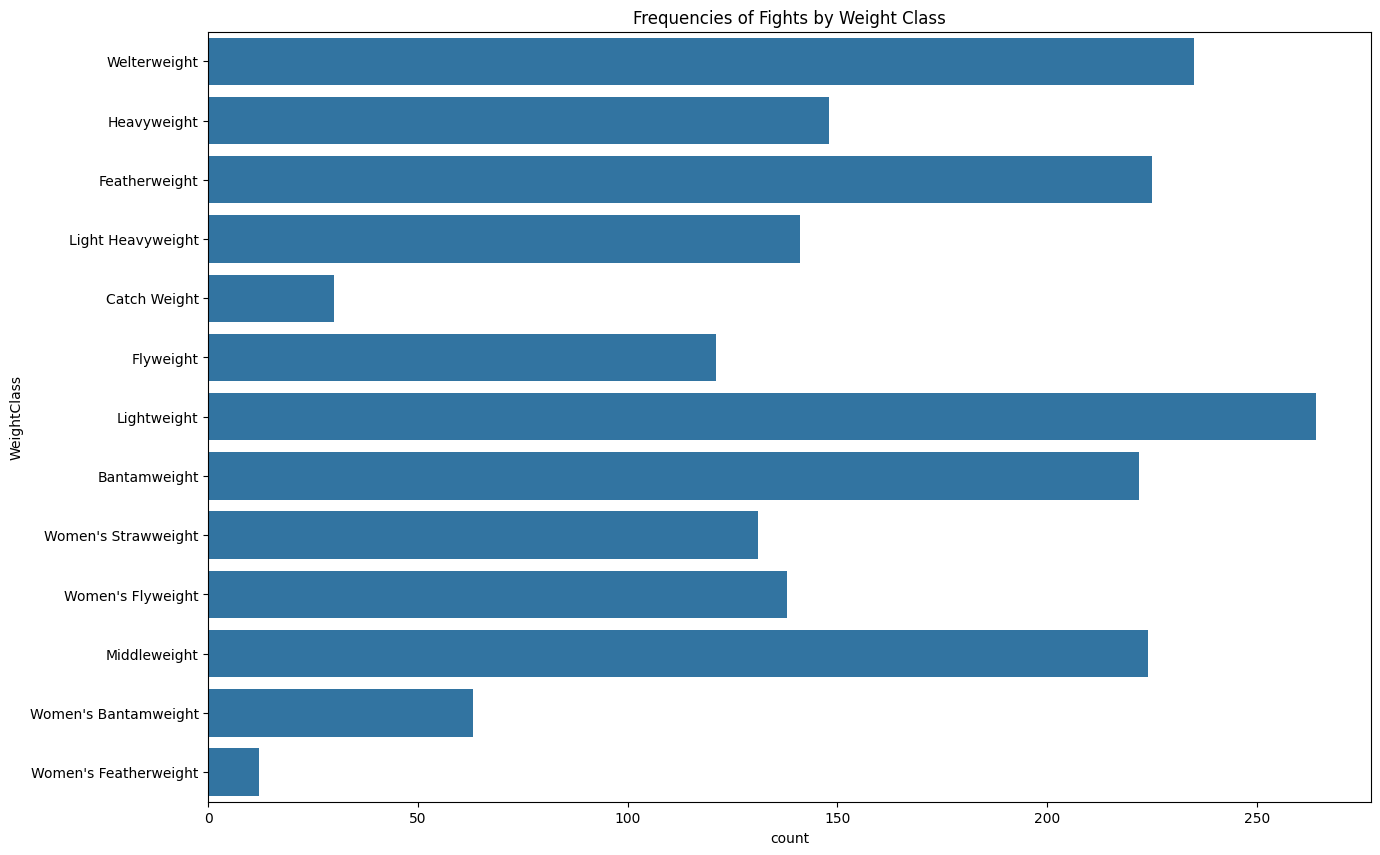

In [1025]:
plt.figure(figsize=(15,10))
sns.countplot(y='WeightClass', data=analysis_df)
plt.title("Frequencies of Fights by Weight Class")
plt.show()

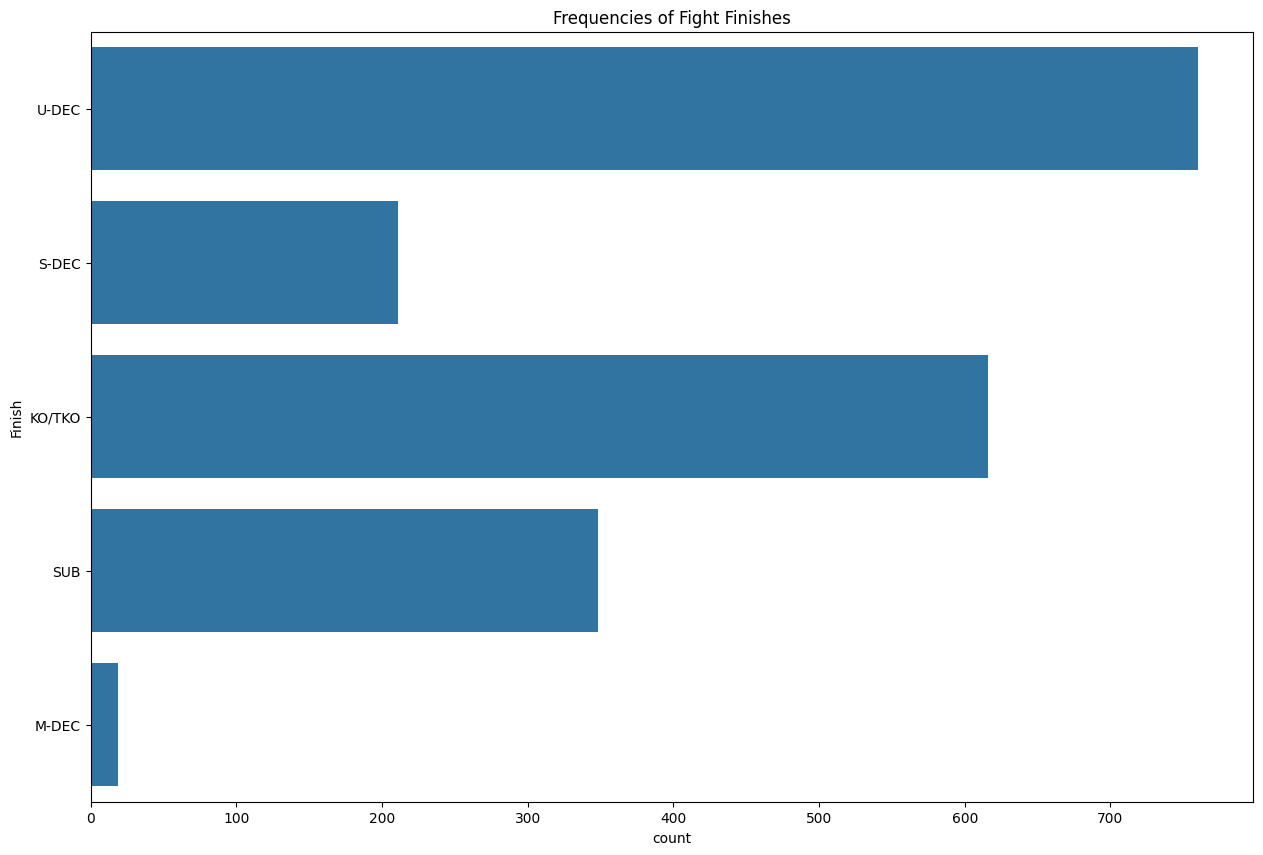

In [1026]:
plt.figure(figsize=(15,10))
sns.countplot(y='Finish', data=analysis_df)
plt.title("Frequencies of Fight Finishes")
plt.show()

In [1027]:
analysis_df

,RedFighter,BlueFighter,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,...,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,Finish,FinishRound,FinishRoundTime,TotalFightTimeSecs
1,Shavkat Rakhmonov,Ian Machado Garry,Red,False,Welterweight,MALE,3,0,8,0,...,5.08,-7.62,-3,1.3800,-1.5000,-0.7200,U-DEC,5.0,5:00,1500.0
2,Ciryl Gane,Alexander Volkov,Red,False,Heavyweight,MALE,3,0,4,0,...,7.62,-2.54,2,-0.3600,-0.3000,-0.1300,S-DEC,3.0,5:00,900.0
3,Bryce Mitchell,Kron Gracie,Red,False,Featherweight,MALE,3,2,0,0,...,-2.54,0.00,6,1.4400,-1.1000,-2.9800,KO/TKO,3.0,0:39,639.0
4,Nate Landwehr,Dooho Choi,Blue,False,Featherweight,MALE,3,0,1,1,...,2.54,-5.08,-3,-1.8400,-0.2000,-0.2500,KO/TKO,3.0,3:21,801.0
5,Dominick Reyes,Anthony Smith,Red,False,Light Heavyweight,MALE,3,1,0,0,...,0.00,-2.54,2,-1.6300,0.3000,0.1100,KO/TKO,2.0,4:46,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,Vinc Pichel,Garett Whiteley,Red,False,Lightweight,MALE,3,1,0,0,...,5.08,0.00,-2,7.0000,0.0000,0.0000,U-DEC,3.0,5:00,900.0
6285,Mark Hunt,Chris Tuchscherer,Red,False,Heavyweight,MALE,3,1,0,0,...,10.16,10.16,1,6.3333,0.3333,-0.6667,KO/TKO,2.0,1:41,401.0
6388,Steve Lopez,Waylon Lowe,Blue,False,Lightweight,MALE,3,1,0,0,...,-10.16,-15.34,-3,-5.0000,0.0000,1.0000,S-DEC,3.0,5:00,900.0
6456,Ben Rothwell,Gilbert Yvel,Red,False,Heavyweight,MALE,3,1,0,0,...,-5.08,-2.54,-5,0.0000,0.0000,0.0000,U-DEC,3.0,5:00,900.0


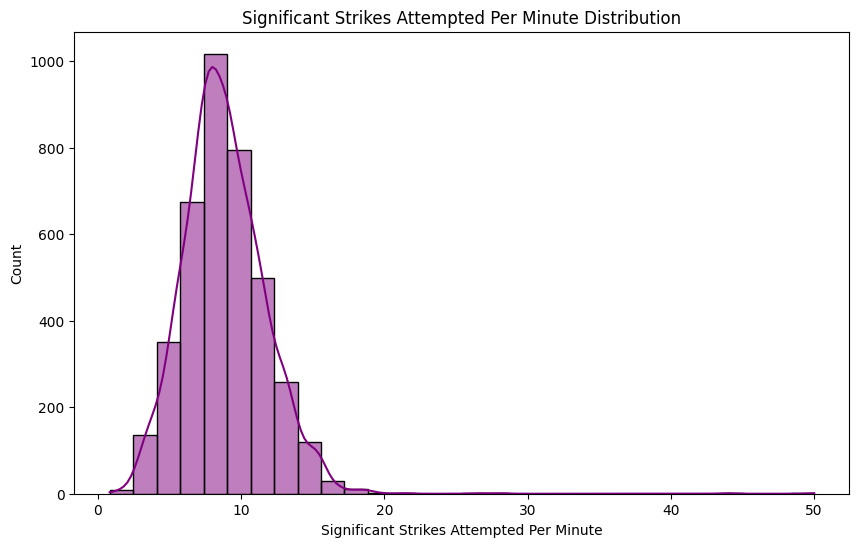

In [1028]:
analysis_df['RedSigStrAttPerMin'] = analysis_df['RedAvgSigStrLanded'] / analysis_df['RedAvgSigStrPct']
analysis_df['BlueSigStrAttPerMin'] = analysis_df['BlueAvgSigStrLanded'] / analysis_df['BlueAvgSigStrPct']

red_df = analysis_df[['RedFighter', 'RedSigStrAttPerMin', 'RedAvgSigStrPct', 'RedAvgTDPct', 'RedAvgSigStrLanded']]
blue_df = analysis_df[['BlueFighter', 'BlueSigStrAttPerMin', 'BlueAvgSigStrPct', 'BlueAvgTDPct', 'BlueAvgSigStrLanded' ]]
red_df.columns = ['Fighter', 'SigStrAttPerMin', 'SigStrPct', 'TDPct', 'AvgSigStrLanded']
blue_df.columns = ['Fighter', 'SigStrAttPerMin', 'SigStrPct', 'TDPct', 'AvgSigStrLanded']
fighters_df = pd.concat([red_df, blue_df], ignore_index=True)

plt.figure(figsize=(10,6))
sns.histplot(fighters_df['SigStrAttPerMin'], bins=30, kde=True, color='purple')
plt.title('Significant Strikes Attempted Per Minute Distribution')
plt.xlabel('Significant Strikes Attempted Per Minute')
plt.ylabel('Count')
plt.show()



In [1029]:
fighters_df

,Fighter,SigStrAttPerMin,SigStrPct,TDPct,AvgSigStrLanded
0,Shavkat Rakhmonov,6.754098,0.61,0.290,4.1200
1,Ciryl Gane,9.150000,0.60,0.210,5.4900
2,Bryce Mitchell,3.965517,0.58,0.410,2.3000
3,Nate Landwehr,13.586957,0.46,0.410,6.2500
4,Dominick Reyes,9.740000,0.50,0.280,4.8700
...,...,...,...,...,...
3903,Garett Whiteley,28.000000,0.25,0.000,7.0000
3904,Chris Tuchscherer,43.859474,0.19,0.047,8.3333
3905,Waylon Lowe,6.250000,0.16,0.160,1.0000
3906,Gilbert Yvel,18.750000,0.16,0.000,3.0000
